__데이터과학과소셜데이터분석 과제2__
===================================

경영학과 2017312717 나종진
-------------------------

## 필요한 라이브러리 import

### 설명 적기
pandas는 어쩌구

matplotlib은 어쩌구

seaborn은 어쩌구

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression


## 데이터 가져오기

### 설명 적기
ExchangeRates는 환율 데이터로 어떻게 구성되어있음

CurrencyFutures은 통화선물데이터로 이렇게 구성되어있음

In [235]:
ExchangeRates = pd.read_csv('./ExchangeRates.csv', index_col=0, na_values=0 )
CurrencyFutures = pd.read_csv('./CurrencyFutures.csv', index_col=0, na_values=0, )
ExchangeRates = ExchangeRates.fillna(0)
CurrencyFutures = CurrencyFutures.fillna(0)

## 데이터 설정

### 시간데이터로 변경

In [236]:
ExchangeRates.index = pd.to_datetime(ExchangeRates.index, format="%Y%m") # dtype = 'datetime64[ns]'로
ExchangeRates.index = ExchangeRates.index.to_period("M") # dtype='period[M]'으로 
CurrencyFutures.index = pd.to_datetime(CurrencyFutures.index, format="%Y%m") # dtype = 'datetime64[ns]'로
CurrencyFutures.index = CurrencyFutures.index.to_period("M") # dtype='period[M]'으로 

### 국가별로 통화선물 구분

In [237]:
AmericanFuture = CurrencyFutures.iloc[:,0:3]
JapanFuture = CurrencyFutures.iloc[:,3:6]
EuroFuture = CurrencyFutures.iloc[:,6:9]
ChinaFuture = CurrencyFutures.iloc[:,9:]

### 국가별로 환율과 통화선물 데이터 병합

In [238]:
AmericanData = pd.merge(ExchangeRates['원/미국달러'], AmericanFuture, how='outer', on='날짜')
JapanData = pd.merge(ExchangeRates['원/일본엔(100엔)'], JapanFuture, how='outer', on='날짜')
EuroData = pd.merge(ExchangeRates['원/유로'], EuroFuture, how='outer', on='날짜')
ChinaData = pd.merge(ExchangeRates['원/위안'], ChinaFuture, how='outer', on='날짜')

### 분석 데이터와 Test 데이터로 구분
(16년 1월 ~ 20년 12월 5년간 데이터 / 21년 1월 ~ 21년 6월 21년 상반기 데이터)

In [239]:
AmericanData_Test = pd.merge(ExchangeRates['원/미국달러']['202101':], AmericanFuture['202101':], how='outer', on='날짜')
JapanData_Test = pd.merge(ExchangeRates['원/일본엔(100엔)']['202101':], JapanFuture['202101':], how='outer', on='날짜')
EuroData_Test = pd.merge(ExchangeRates['원/유로']['202101':], EuroFuture['202101':], how='outer', on='날짜')
ChinaData_Test = pd.merge(ExchangeRates['원/위안']['202101':], ChinaFuture['202101':], how='outer', on='날짜')

AmericanData = pd.merge(ExchangeRates['원/미국달러'][:'202012'], AmericanFuture[:'202012'], how='outer', on='날짜')
JapanData = pd.merge(ExchangeRates['원/일본엔(100엔)'][:'202012'], JapanFuture[:'202012'], how='outer', on='날짜')
EuroData = pd.merge(ExchangeRates['원/유로'][:'202012'], EuroFuture[:'202012'], how='outer', on='날짜')
ChinaData = pd.merge(ExchangeRates['원/위안'][:'202012'], ChinaFuture[:'202012'], how='outer', on='날짜')

## 데이터 분석

### 산포도, 상관관계, 단순선형회귀분석 
- 미국
- 일본
- 유럽
- 중국

#### 미국 데이터 분석
- 미국달러선물 계약수 & 원/미국달러
- 미국달러선물 계약금액 & 원/미국달러
- 미국달러선물 미약정계약 & 원/미국달러

In [240]:
X = pd.DataFrame(AmericanData['미국달러선물 계약수 (계약)'].values, columns = [['Contracts Num']], dtype=float)
y = pd.DataFrame(AmericanData['원/미국달러'].values, columns = [['Exchange']], dtype=float)
AmericanCorrFuturesNumAndExchanges = pd.concat([X, y], axis=1).corr()
print(AmericanCorrFuturesNumAndExchanges)

              Contracts Num  Exchange
Contracts Num      1.000000  0.435282
Exchange           0.435282  1.000000


In [241]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[1.20263884e-05]]
[1067.90936144]
0.18947077624483444


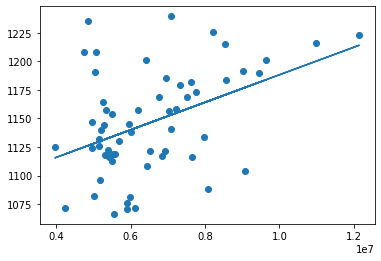

In [242]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [243]:
X = pd.DataFrame(AmericanData['미국달러선물 계약금액 (백만원)'].values, columns = [['Contracts Amount']], dtype=float)
y = pd.DataFrame(AmericanData['원/미국달러'].values, columns = [['Exchange']], dtype=float)
AmericanCorrFuturesAmountAndExchanges = pd.concat([X, y], axis=1).corr()
print(AmericanCorrFuturesAmountAndExchanges)

                 Contracts Amount  Exchange
Contracts Amount         1.000000  0.532559
Exchange                 0.532559  1.000000


In [244]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[1.17473568e-06]]
[1058.11180207]
0.28361918900683314


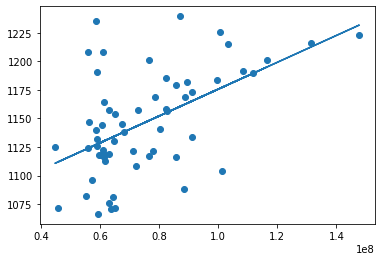

In [245]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [246]:
X = pd.DataFrame(AmericanData['미국달러선물 미결제약정 (계약)'].values, columns = [['Open Interest Contracts']], dtype=float)
y = pd.DataFrame(AmericanData['원/미국달러'].values, columns = [['Exchange']], dtype=float)
AmericanCorrFuturesOIAndExchanges = pd.concat([X, y], axis=1).corr()
print(AmericanCorrFuturesOIAndExchanges)

                        Open Interest Contracts  Exchange
Open Interest Contracts                1.000000 -0.000303
Exchange                              -0.000303  1.000000


In [247]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[-1.32799307e-07]]
[1146.39967775]
9.168784675939179e-08


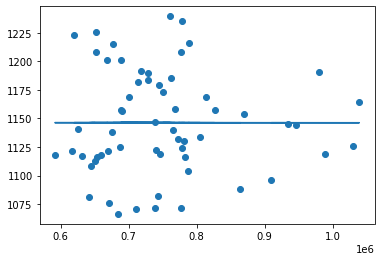

In [248]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

#### 일본 데이터 분석
- 엔선물 계약수 & 원/일본엔(100엔)
- 엔선물 계약금액 & 원/일본엔(100엔)
- 엔선물 미약정계약 & 원/일본엔(100엔)

In [249]:
X = pd.DataFrame(JapanData['엔선물 계약수 (계약)'].values, columns = [['Contracts']], dtype=float)
y = pd.DataFrame(JapanData['원/일본엔(100엔)'].values, columns = [['Exchange']], dtype=float)
JapanCorrFuturesAndExchanges = pd.concat([X, y], axis=1).corr()
print(JapanCorrFuturesAndExchanges)

          Contracts  Exchange
Contracts  1.000000  0.105646
Exchange   0.105646  1.000000


In [250]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[0.00038752]]
[1028.1622074]
0.011161099162845356


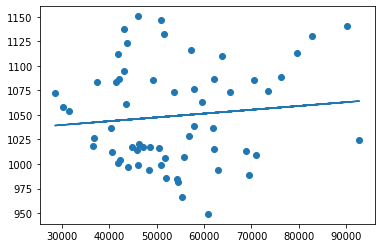

In [251]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [252]:
X = pd.DataFrame(JapanData['엔선물 계약금액 (백만원)'].values, columns = [['Contracts Amount']], dtype=float)
y = pd.DataFrame(JapanData['원/일본엔(100엔)'].values, columns = [['Exchange']], dtype=float)
JapanCorrFuturesAmountAndExchanges = pd.concat([X, y], axis=1).corr()
print(JapanCorrFuturesAmountAndExchanges)

                 Contracts Amount  Exchange
Contracts Amount         1.000000  0.273776
Exchange                 0.273776  1.000000


In [253]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[9.00975529e-05]]
[998.13668442]
0.07495351298004671


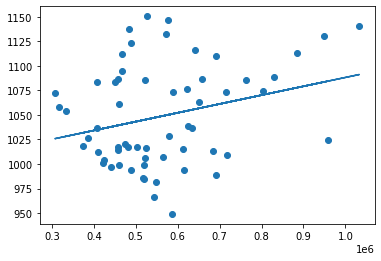

In [254]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [255]:
X = pd.DataFrame(JapanData['엔선물 미결제약정 (계약)'].values, columns = [['Open Interest Contracts']], dtype=float)
y = pd.DataFrame(JapanData['원/일본엔(100엔)'].values, columns = [['Exchange']], dtype=float)
JapanCorrFuturesOIAndExchanges = pd.concat([X, y], axis=1).corr()
print(JapanCorrFuturesOIAndExchanges)

                        Open Interest Contracts  Exchange
Open Interest Contracts                1.000000  0.265742
Exchange                               0.265742  1.000000


In [256]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[0.00374101]]
[986.77417559]
0.07061861378045975


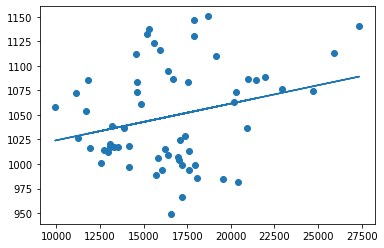

In [257]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

#### 유럽 데이터 분석
- 유로선물 계약수 & 원/유로
- 유로선물 계약금액 & 원/유로
- 유로선물 미약정계약 & 원/유로

In [258]:
X = pd.DataFrame(EuroData['유로선물 계약수 (계약)'].values, columns = [['Contracts']], dtype=float)
y = pd.DataFrame(EuroData['원/유로'].values, columns = [['Exchange']], dtype=float)
EuroCorrFuturesAndExchanges = pd.concat([X, y], axis=1).corr()
print(EuroCorrFuturesAndExchanges)

          Contracts  Exchange
Contracts  1.000000  0.450255
Exchange   0.450255  1.000000


In [259]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[0.00191565]]
[1184.54714223]
0.2027296158985341


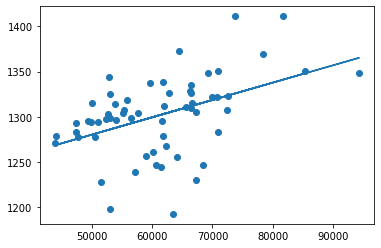

In [260]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [261]:
X = pd.DataFrame(EuroData['유로선물 계약금액 (백만원)'].values, columns = [['Contracts Amount']], dtype=float)
y = pd.DataFrame(EuroData['원/유로'].values, columns = [['Exchange']], dtype=float)
EuroCorrFuturesAmountAndExchanges = pd.concat([X, y], axis=1).corr()
print(EuroCorrFuturesAmountAndExchanges)

                 Contracts Amount  Exchange
Contracts Amount         1.000000  0.572079
Exchange                 0.572079  1.000000


In [262]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[0.00016684]]
[1168.44969725]
0.3272743948674137


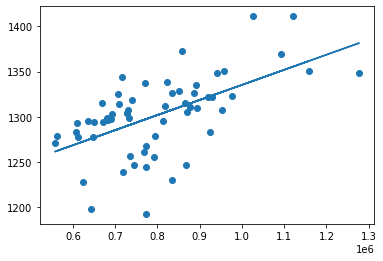

In [263]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [264]:
X = pd.DataFrame(EuroData['유로선물 미결제약정 (계약)'].values, columns = [['Open Interest Contracts']], dtype=float)
y = pd.DataFrame(EuroData['원/유로'].values, columns = [['Exchange']], dtype=float)
EuroCorrFuturesOIAndExchanges = pd.concat([X, y], axis=1).corr()
print(EuroCorrFuturesOIAndExchanges)

                        Open Interest Contracts  Exchange
Open Interest Contracts                1.000000 -0.134151
Exchange                              -0.134151  1.000000


In [265]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[-0.00106455]]
[1337.99068001]
0.017996448297650014


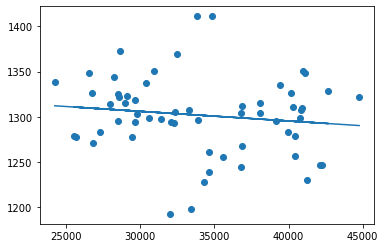

In [266]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

#### 중국 데이터 분석
- 위안선물 계약수 & 원/위안
- 위안선물 계약금액 & 원/위안
- 위안선물 미약정계약 & 원/위안

In [267]:
X = pd.DataFrame(ChinaData['위안선물 계약수 (계약)'].values, columns = [['Contracts']], dtype=float)
y = pd.DataFrame(ChinaData['원/위안'].values, columns = [['Exchange']], dtype=float)
ChinaCorrFuturesAndExchanges = pd.concat([X, y], axis=1).corr()
print(ChinaCorrFuturesAndExchanges)

          Contracts  Exchange
Contracts  1.000000 -0.011423
Exchange  -0.011423  1.000000


In [268]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[-0.00011932]]
[169.26731524]
0.00013049166206657858


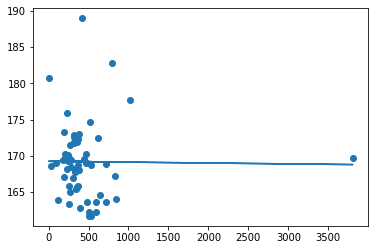

In [269]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [270]:
X = pd.DataFrame(ChinaData['위안선물 계약금액 (백만원)'].values, columns = [['Contracts Amount']], dtype=float)
y = pd.DataFrame(ChinaData['원/위안'].values, columns = [['Exchange']], dtype=float)
ChinaCorrFuturesAmountAndExchanges = pd.concat([X, y], axis=1).corr()
print(ChinaCorrFuturesAmountAndExchanges)

                 Contracts Amount  Exchange
Contracts Amount         1.000000  0.015822
Exchange                 0.015822  1.000000


In [271]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[9.68875516e-06]]
[169.14138605]
0.00025033951030539736


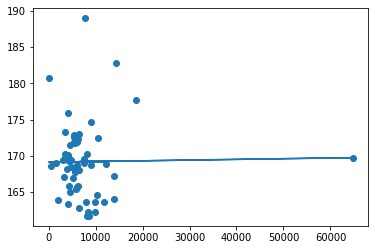

In [272]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

In [286]:
X = pd.DataFrame(ChinaData['위안선물 미결제약정 (계약)'].values, columns = [['Open Interest Contracts']], dtype=float)
y = pd.DataFrame(ChinaData['원/위안'].values, columns = [['Exchange']], dtype=float)
ChinaCorrFuturesOIAndExchanges = pd.concat([X, y], axis=1).corr()
print(ChinaCorrFuturesOIAndExchanges)

                        Open Interest Contracts  Exchange
Open Interest Contracts                1.000000 -0.382908
Exchange                              -0.382908  1.000000


In [287]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_) # 기울기 계수 출력
print(lr.intercept_) # 절편 출력
print(lr.score(X, y)) # 상관계수 출력

[[-0.03310312]]
[172.28133765]
0.14661841255337993


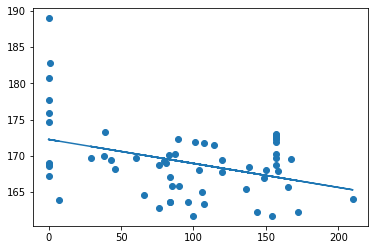

In [290]:
y1 = (lr.coef_)*X + (lr.intercept_)
plt.scatter (X, y)
plt.plot(X, y1)

### 다중회귀분석 및 test
- 미국
- 일본
- 유럽
- 중국

#### 미국 데이터 다중회기분석 및 테스트

In [300]:
X = AmericanData.iloc[:,1:]
y = pd.DataFrame(AmericanData['원/미국달러'].values, columns = [['Exchange']], dtype=float)
lr2 = LinearRegression()
lr2.fit(X, y)
print(lr2.coef_)
print(lr2.intercept_)
print(lr2.score(X, y))

[[-1.72657040e-04  1.48810389e-05  1.94510322e-05]]
[1139.98713361]
0.8726104017469026


In [302]:
print(lr2.predict(AmericanData_Test.iloc[:,1:]))
print(AmericanData_Test.iloc[:,:1])

[[1076.11940773]
 [1104.15307589]
 [1120.66372977]
 [1107.67874642]
 [1117.84606548]
 [1111.94223309]]
         원/미국달러
날짜             
2021-01  1114.6
2021-02  1108.4
2021-03  1133.5
2021-04  1107.4
2021-05  1116.0
2021-06  1130.0


#### 일본 데이터 다중회기분석

In [279]:
X = JapanData.iloc[:,1:]
y = pd.DataFrame(JapanData['원/일본엔(100엔)'].values, columns = [['Exchange']], dtype=float)
lr2 = LinearRegression()
lr2.fit(X, y)
print(lr2.coef_)
print(lr2.intercept_)
print(lr2.score(X, y))

[[-0.01725351  0.00160194  0.00052733]]
[1061.79008329]
0.8457023835486454


In [280]:
print(lr2.predict(JapanData_Test.iloc[:,1:]))
print(JapanData_Test.iloc[:,:1])

[[1058.32098679]
 [1060.10640552]
 [1052.24764506]
 [1046.93204289]
 [1049.20278349]
 [1043.84509932]]
         원/일본엔(100엔)
날짜                  
2021-01      1069.26
2021-02      1043.15
2021-03      1027.33
2021-04      1016.90
2021-05      1015.70
2021-06      1022.12


#### 유럽 데이터 다중회기분석

In [281]:
X = EuroData.iloc[:,1:]
y = pd.DataFrame(EuroData['원/유로'].values, columns = [['Exchange']], dtype=float)
lr2 = LinearRegression()
lr2.fit(X, y)
print(lr2.coef_)
print(lr2.intercept_)
print(lr2.score(X, y))

[[-1.81292321e-02  1.39268111e-03  1.31082263e-05]]
[1297.75858818]
0.8130268157472679


In [282]:
print(lr2.predict(EuroData_Test.iloc[:,1:]))
print(EuroData_Test.iloc[:,:1])

[[1328.25078489]
 [1338.13082331]
 [1343.64536219]
 [1329.83227939]
 [1356.40839483]
 [1346.98463628]]
            원/유로
날짜              
2021-01  1351.12
2021-02  1349.86
2021-03  1328.29
2021-04  1342.33
2021-05  1360.91
2021-06  1344.42


#### 중국 데이터 다중회기분석

In [283]:
X = ChinaData.iloc[:,1:]
y = pd.DataFrame(ChinaData['원/위안'].values, columns = [['Exchange']], dtype=float)
lr2 = LinearRegression()
lr2.fit(X, y)
print(lr2.coef_)
print(lr2.intercept_)
print(lr2.score(X, y))

[[-0.23390125  0.0137209  -0.0055535 ]]
[170.28712258]
0.6349312107764751


In [284]:
print(lr2.predict(ChinaData_Test.iloc[:,1:]))
print(ChinaData_Test.iloc[:,:1])

[[169.34420951]
 [170.08281427]
 [170.96650556]
 [169.67867839]
 [171.41057224]
 [171.27917081]]
           원/위안
날짜             
2021-01  171.45
2021-02  171.86
2021-03  172.35
2021-04  171.20
2021-05  175.22
2021-06  174.84


In [ ]:
## 다중회귀분석 그래프 그려보기!

# X1 = (lr2.coef_[0][0] * X.iloc[:,0:1])
# X2 = (lr2.coef_[0][1] * X.iloc[:,1:2])
# X3 = (lr2.coef_[0][2] * X.iloc[:,2:3])
# X0 = X1.values + X2.values + X3.values
# y1 = X0 + (lr.intercept_)

# plt.plot(X0, y1)
# plt.scatter(X1, y)
# plt.scatter(X2, y)
# plt.scatter(X3, y)